In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
os.environ["OMP_NUM_THREADS"] = '1'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config Completer.use_jedi = False
%config InlineBackend.figure_format = 'retina'

In [116]:
water_tr = pd.read_csv('C:\\k_disital\\source\\mygit\\ML-First-Project\\data_city\\data_tr_city.csv')
water_ts = pd.read_csv('C:\k_disital\source\mygit\ML-First-Project\data_city\\data_ts_city.csv')

In [117]:
#water = pd.concat([water_tr, water_ts])
water = water_tr

In [120]:
water['target'] = water['구미 혁신도시배수지 유출유량 적산차']
water = water.drop('구미 혁신도시배수지 유출유량 적산차', axis=1)

In [118]:
water['datetime'] = water['datetime'].astype('datetime64[ns]')

In [7]:
water = water.set_index('datetime')
water

,target
datetime,
2017-01-01 01:00:00,138.0
2017-01-01 02:00:00,237.0
2017-01-01 03:00:00,128.0
2017-01-01 04:00:00,14.0
2017-01-01 05:00:00,11.0
...,...
2021-12-17 19:00:00,327.0
2021-12-17 20:00:00,513.0
2021-12-17 21:00:00,396.0


In [8]:
water.index = water.index.to_period('h')

In [9]:
water.index

PeriodIndex(['2017-01-01 01:00', '2017-01-01 02:00', '2017-01-01 03:00',
             '2017-01-01 04:00', '2017-01-01 05:00', '2017-01-01 06:00',
             '2017-01-01 07:00', '2017-01-01 08:00', '2017-01-01 09:00',
             '2017-01-01 10:00',
             ...
             '2021-12-17 14:00', '2021-12-17 15:00', '2021-12-17 16:00',
             '2021-12-17 17:00', '2021-12-17 18:00', '2021-12-17 19:00',
             '2021-12-17 20:00', '2021-12-17 21:00', '2021-12-17 22:00',
             '2021-12-17 23:00'],
            dtype='period[H]', name='datetime', length=43487)

<AxesSubplot:xlabel='datetime'>

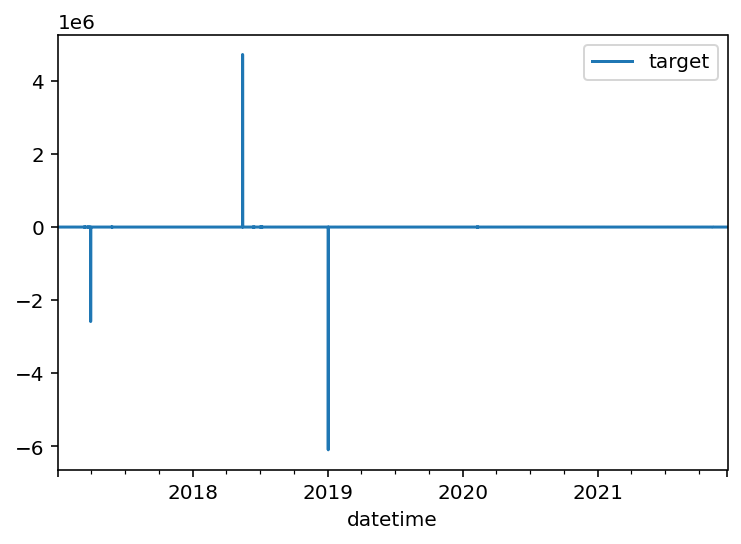

In [10]:
water.plot()

In [11]:
water.isna().sum()

target    8
dtype: int64

In [167]:
water.sort_values(by='target', ascending=False)

,target
datetime,
2018-05-15 20:00,4720655.0
2017-05-27 10:00,4999.0
2017-05-28 06:00,3357.0
2017-05-31 08:00,2591.0
2017-05-28 15:00,2550.0
...,...
2018-06-14 22:00,NaN
2018-07-04 12:00,NaN
2018-07-06 11:00,NaN


In [166]:
water.sort_values(by='target', ascending=True)

,target
datetime,
2019-01-02 15:00,-6093821.0
2017-03-30 16:00,-2584551.0
2017-05-28 10:00,0.0
2017-05-26 13:00,0.0
2018-06-06 13:00,0.0
...,...
2018-06-14 22:00,NaN
2018-07-04 12:00,NaN
2018-07-06 11:00,NaN


In [179]:
water[water.index.hour == 20]

,target
datetime,
2017-01-01 20:00,245.0
2017-01-02 20:00,252.0
2017-01-03 20:00,362.0
2017-01-04 20:00,246.0
2017-01-05 20:00,76.0
...,...
2021-12-13 20:00,689.0
2021-12-14 20:00,316.0
2021-12-15 20:00,612.0


In [182]:
water[water.target == 0]

,target
datetime,
2017-03-28 17:00,0.0
2017-04-29 14:00,0.0
2017-04-29 16:00,0.0
2017-04-29 17:00,0.0
2017-04-29 18:00,0.0
...,...
2018-06-06 14:00,0.0
2018-06-06 15:00,0.0
2019-06-19 20:00,0.0


In [38]:
test =

In [40]:
test - 100

target    120.0
Name: 2018-03-28 16:00, dtype: float64

In [72]:
a = water[water.index == '2017-03-26 17:00'].iloc[0]
b = water[water.index == '2017-03-27 17:00'].iloc[0]
c= water[water.index == '2017-03-28 17:00'].iloc[0]
d = water[water.index == '2017-03-29 17:00'].iloc[0]
e = water[water.index == '2017-04-01 17:00'].iloc[0]

In [79]:
print(a, b, c, d, e)

target    364.0
Name: 2017-03-26 17:00, dtype: float64 target    228.0
Name: 2017-03-27 17:00, dtype: float64 target    0.0
Name: 2017-03-28 17:00, dtype: float64 target    151.0
Name: 2017-03-29 17:00, dtype: float64 target    136.0
Name: 2017-04-01 17:00, dtype: float64


In [82]:
a= water[water.index == '2017-03-28 15:00'].iloc[0]
b= water[water.index == '2017-03-28 16:00'].iloc[0]
c= water[water.index == '2017-03-28 17:00'].iloc[0]
d= water[water.index == '2017-03-28 18:00'].iloc[0]
e= water[water.index == '2017-03-28 19:00'].iloc[0]

In [83]:
print(a, b, c, d, e)

target    293.0
Name: 2017-03-28 15:00, dtype: float64 target    129.0
Name: 2017-03-28 16:00, dtype: float64 target    0.0
Name: 2017-03-28 17:00, dtype: float64 target    322.0
Name: 2017-03-28 18:00, dtype: float64 target    526.0
Name: 2017-03-28 19:00, dtype: float64


In [76]:
x = water[water.index == '2017-03-28 16:00'].iloc[0]

In [53]:
x

target    129.0
Name: 2017-03-28 16:00, dtype: float64

In [54]:
x+y

target    190.25
dtype: float64

In [55]:
a = water[water.index == '2017-03-28 16:00'].iloc[0]
aa = water[water.index == '2017-03-28 17:00'].iloc[0]
aaa = water[water.index == '2017-03-28 18:00'].iloc[0]

In [56]:
print(a)
print(aa)
print(aaa)

target    129.0
Name: 2017-03-28 16:00, dtype: float64
target    0.0
Name: 2017-03-28 17:00, dtype: float64
target    322.0
Name: 2017-03-28 18:00, dtype: float64


In [84]:
from sktime.utils.plotting import plot_series

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

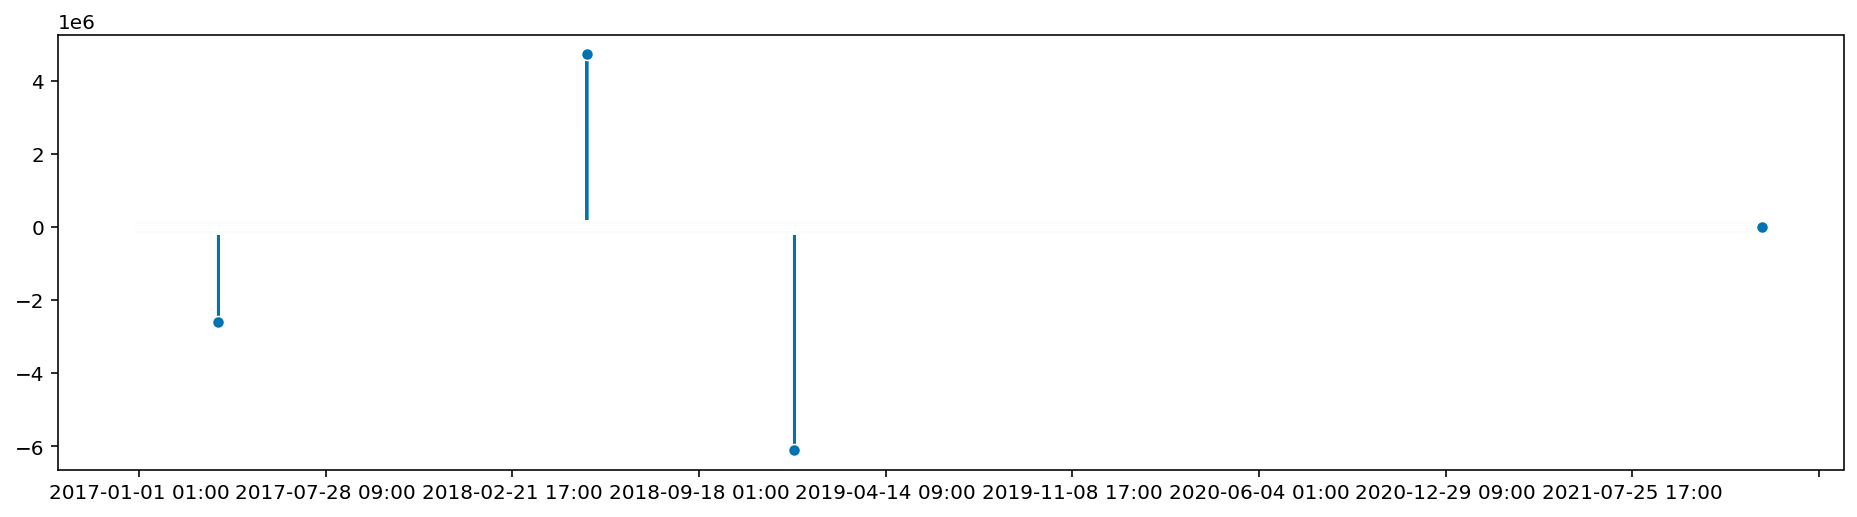

In [86]:
plot_series(water)

In [122]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35063 entries, 0 to 35062
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  35063 non-null  datetime64[ns]
 1   target    35055 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 548.0 KB


In [124]:
year21 = water[water.datetime.dt.year == 2021]

In [125]:
year21

,datetime,target


In [96]:
year21[year21 == 0].count()

target    1
dtype: int64

In [97]:
f_quadr = interpolate.interp1d(
    water.index, water.target, kind='quadratic') # cubic

y_new_quadr = f_quadr(xnew)

plt.plot(x, y, "o", xnew, y_new_quadr)
plt.show()

NameError: name 'interpolate' is not defined

In [106]:
year21 = year21.replace(0, np.NaN)

In [109]:
year21.isna().count()

target    8424
dtype: int64

In [111]:
year21[year21.target.isna()]

,target
2021-03-04 13:00,NaN


In [115]:
from scipy import interpolate
f_quadr = interpolate.interp1d(
    year21.target,year21.indext, kind='quadratic') # cubic

y_new_quadr = f_quadr(year21.target)

plt.plot(x, y, "o", xnew, y_new_quadr)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'indext'